### Initialising

In [2]:
# run this the first time you use grblc to download SFD maps

# import grblc.convert.sfd
# grblc.convert.sfd.fetch()

In [1]:
# initialise lightcurve object

from grblc.lightcurve import Lightcurve

grb = '170817A'

lc = Lightcurve(
    grb,
    path = 'raw',
    data_space = 'lin',
    save = False
    )

lc.displayGRB()

### `Photometry` module

Warning: The functions in this module take a while to complete the calculations as it involves cross-matching filters and telescopes for each data point.

In [ ]:
# convert to AB system and correct for extinction
# Took 15 minutes for me :)

lc.convertGRB(
            save = True,
            debug = False
            )

In [ ]:
# spectral index calculation

from grblc.lightcurve import Lightcurve

grb = '170817A'
lc = Lightcurve(
    grb,
    path = 'converted',
    data_space = 'lin',
    save_in_folder = None
    )

lc.betaGRB()

In [ ]:
lc.host_kcorrectGRB()

### `Evolution` module

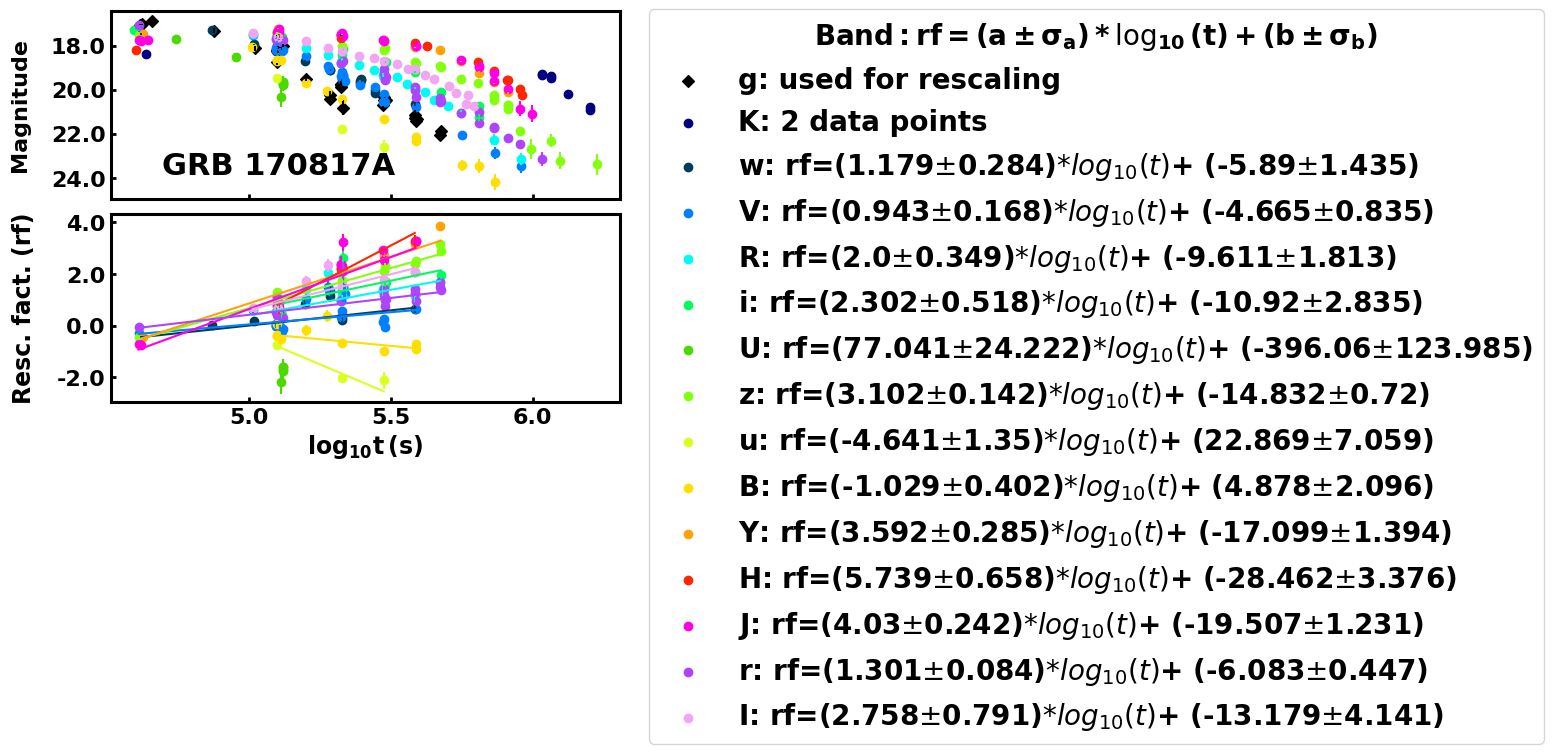

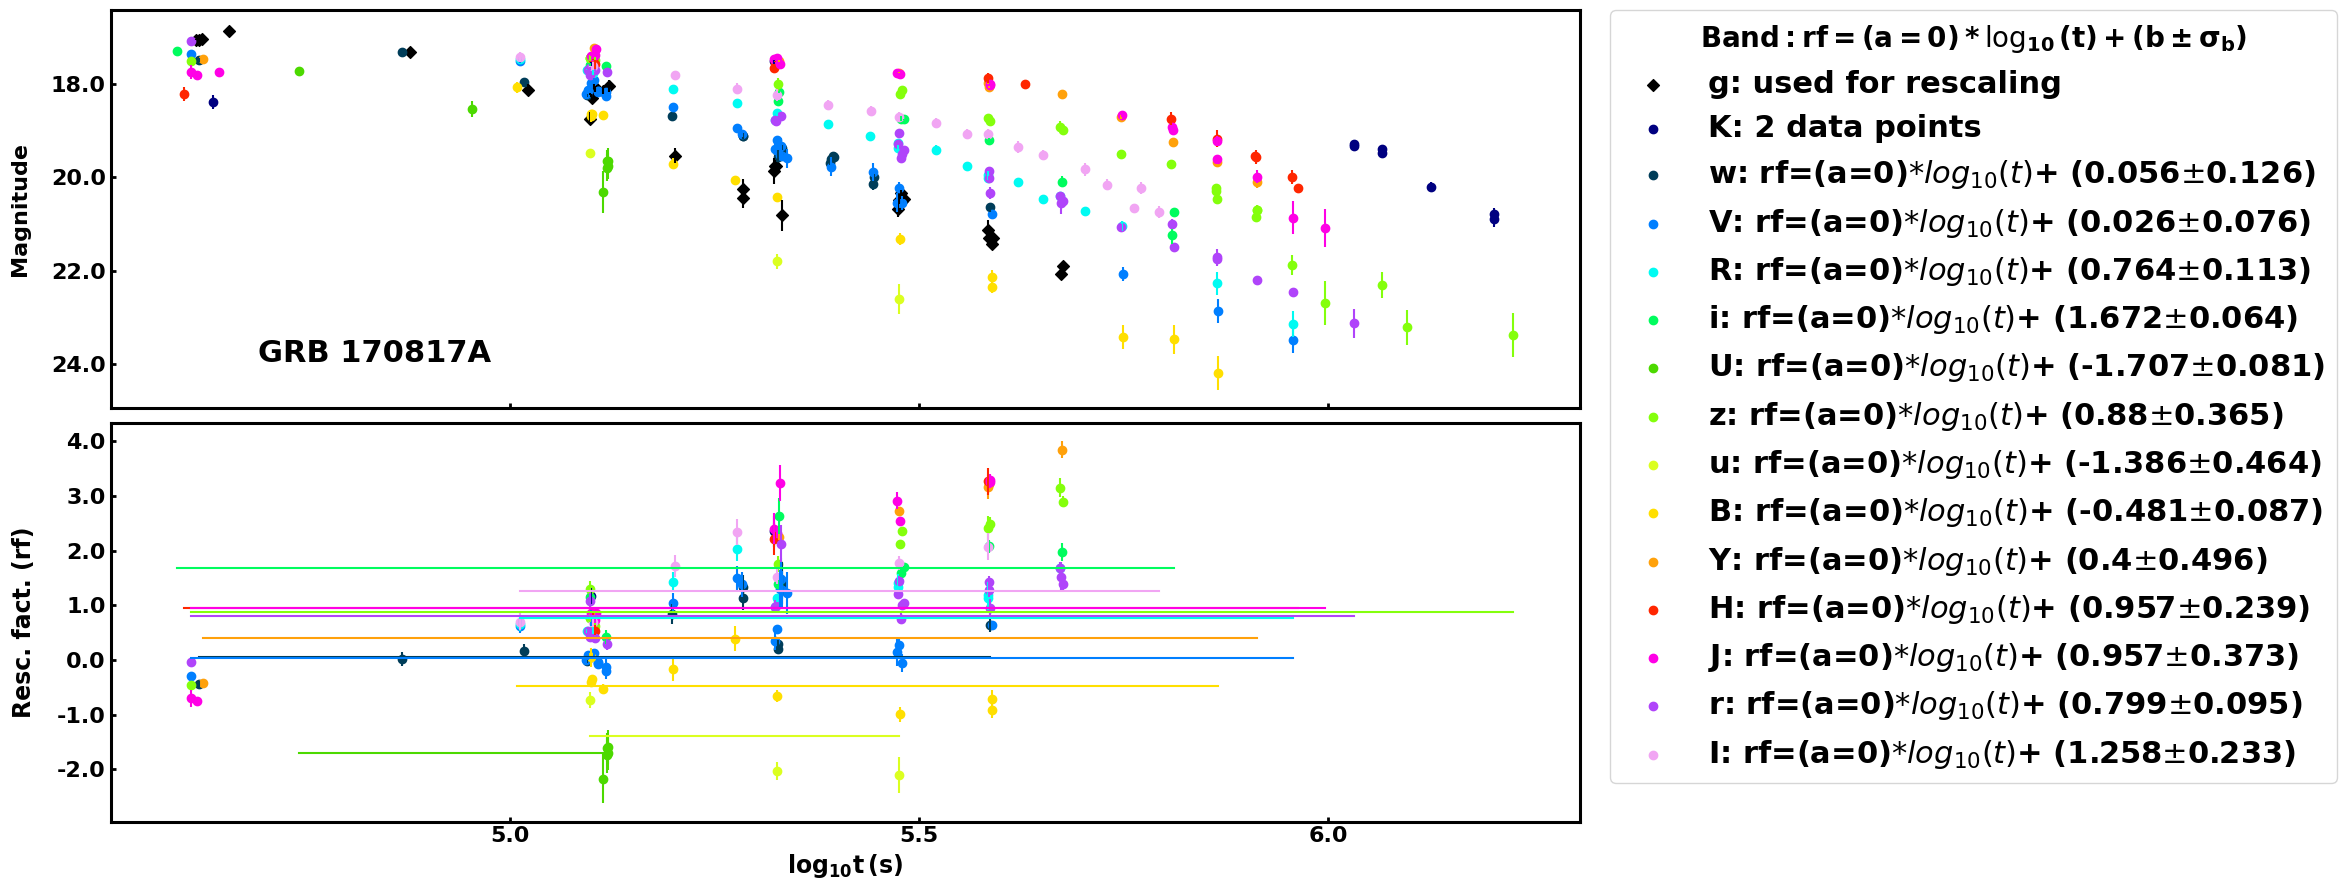

In [2]:
# analysing colour evolution

# initialise lightcurve object

from grblc.lightcurve import Lightcurve

grb = '170817A'
lc = Lightcurve(
    grb,
    path = 'converted',
    data_space = 'lin',
    appx_bands = True,
    save = False
    )

fig, *__ = lc.colorevolGRB()

In [3]:
# rescaling GRB

figunresc, figresc, resc_mag_df = lc.rescaleGRB()

figunresc.show()
figresc.show()